In [230]:
## Importing Libraries

import numpy as np  # Linear algebra operations
import pandas as pd  # Data processing and analysis
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [232]:
## Upload dataset

df = pd.read_csv('/Users/serenaygoler/heart disease.csv')

df.head() # Displays the first 5 rows.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [234]:
df.tail() # Display the last 5 rows.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [236]:
df.info() # Prints name and type of variables, number of observations, and counts of non-missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [238]:
df.shape # Displays the number of rows and columns in the dataset.

(918, 12)

In [240]:
df.isna().sum() # Counts missing values in each column.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [242]:
df.duplicated().sum() # Counts the number of duplicate rows.

0

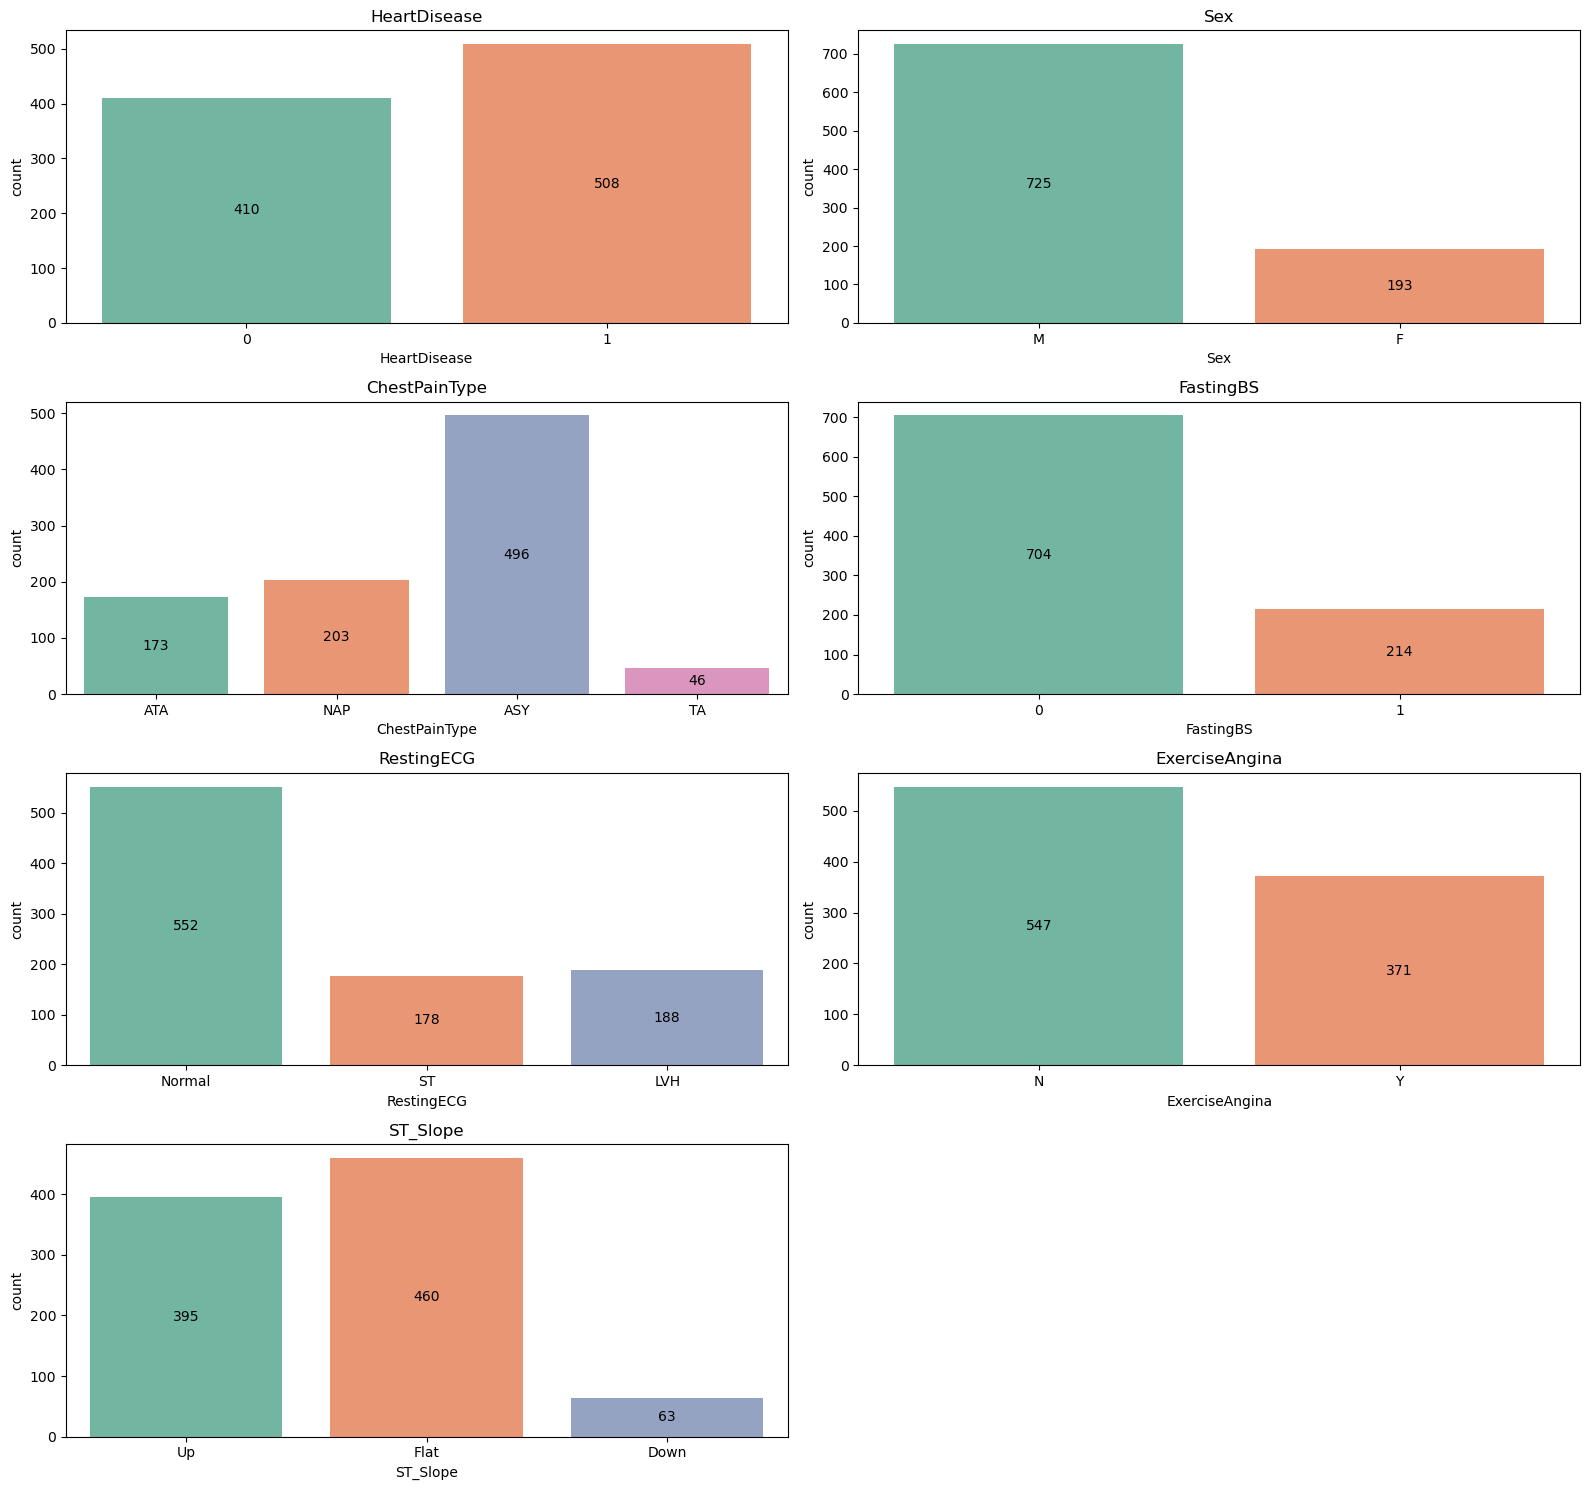

In [244]:
## Each subplot shows the frequency of categories for a specific column.

categorical_cols = ["HeartDisease", "Sex", "ChestPainType", "FastingBS", "RestingECG", 
                    "ExerciseAngina", "ST_Slope"]  

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 15))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    sns.countplot(x=df[col], hue=df[col], ax=ax, palette="Set2", legend=False)
    ax.set_title(col)
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

for ax in axes[len(categorical_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [246]:
## Provides summary statistics for numeric columns, rounded to 2 decimals and transposed for readability.
df.describe().round(2).T 

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.51,9.43,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.40,18.51,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.80,109.38,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.23,0.42,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.81,25.46,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.89,1.07,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.55,0.50,0.0,0.00,1.0,1.0,1.0


In [248]:
# Count how many Cholesterol values are zero
chol_zero_count = (df["Cholesterol"] == 0).sum()

# Count how many RestingBP values are zero
bp_zero_count = (df["RestingBP"] == 0).sum()

print(f"Number of Cholesterol values equal to 0: {chol_zero_count}")
print(f"Number of RestingBP values equal to 0: {bp_zero_count}")

Number of Cholesterol values equal to 0: 172
Number of RestingBP values equal to 0: 1


In [250]:
## Filters out rows where Cholesterol equals zero and returns summary statistics for the remaining valid values. 

print(df[df["Cholesterol"] != 0]["Cholesterol"].describe()) 

count    746.000000
mean     244.635389
std       59.153524
min       85.000000
25%      207.250000
50%      237.000000
75%      275.000000
max      603.000000
Name: Cholesterol, dtype: float64


In [252]:
# With zeros included
print("=== With Zero values Included ===")
print(df.groupby("HeartDisease")["Cholesterol"].describe())

# Zeros removed
print("\n===  With zero values removed ===")
print(df[df["Cholesterol"] != 0].groupby("HeartDisease")["Cholesterol"].describe())

=== With Zero values Included ===
              count        mean         std  min     25%    50%     75%    max
HeartDisease                                                                  
0             410.0  227.121951   74.634659  0.0  197.25  227.0  266.75  564.0
1             508.0  175.940945  126.391398  0.0    0.00  217.0  267.00  603.0

===  With zero values removed ===
              count        mean        std    min    25%    50%     75%    max
HeartDisease                                                                  
0             390.0  238.769231  55.394617   85.0  203.0  231.5  269.00  564.0
1             356.0  251.061798  62.462713  100.0  212.0  246.0  283.25  603.0


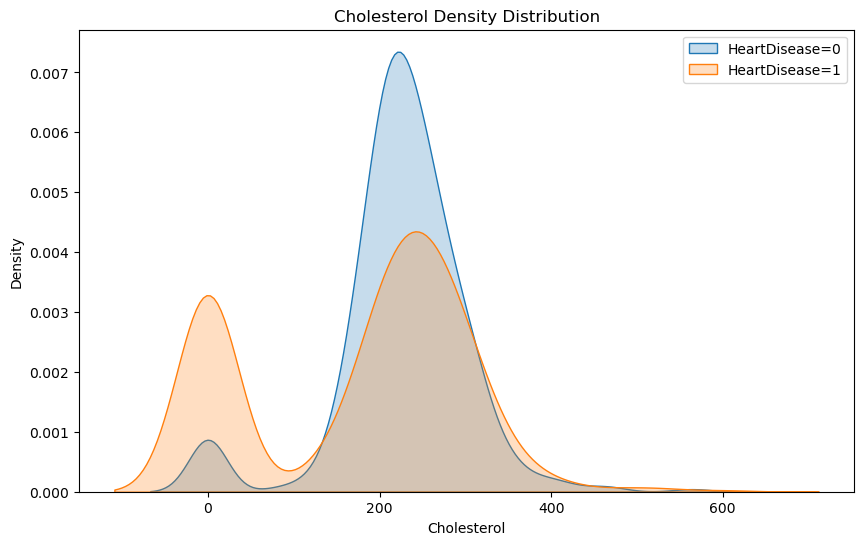

In [254]:
# Plot the cholesterol distribution for HeartDisease=0 and HeartDisease=1 using KDE plots
plt.figure(figsize=(10,6))
sns.kdeplot(df[df["HeartDisease"]==0]["Cholesterol"], label="HeartDisease=0", fill=True)
sns.kdeplot(df[df["HeartDisease"]==1]["Cholesterol"], label="HeartDisease=1", fill=True)
plt.legend()
plt.title("Cholesterol Density Distribution")
plt.show()

In [256]:
# This block cleans the dataset by:
# 1. Removing rows where RestingBP = 0 (unrealistic values).
# 2. Calculating group-wise medians of Cholesterol (by HeartDisease) excluding zeros.
# 3. Replacing Cholesterol values of zero with the corresponding group median.
# 4. Checking that no zero values remain.
# 5. Displaying summary statistics of Cholesterol by HeartDisease after cleaning.

df_clean = df.copy()
df_clean = df_clean[df_clean["RestingBP"] != 0].copy()

medians = (
    df_clean[df_clean["Cholesterol"] != 0]
    .groupby("HeartDisease")["Cholesterol"]
    .median()
)

mask_zero = df_clean["Cholesterol"] == 0
df_clean["Cholesterol"] = df_clean["Cholesterol"].astype(float)
df_clean.loc[mask_zero, "Cholesterol"] = (
    df_clean.loc[mask_zero, "HeartDisease"].map(medians)
)

print("Remaining zeros:", (df_clean["Cholesterol"] == 0).sum())
print(df_clean.groupby("HeartDisease")["Cholesterol"].describe())

Remaining zeros: 0
              count        mean        std    min    25%    50%     75%    max
HeartDisease                                                                  
0             410.0  238.414634  54.045994   85.0  204.0  231.5  266.75  564.0
1             507.0  249.554241  52.370323  100.0  225.0  246.0  267.00  603.0


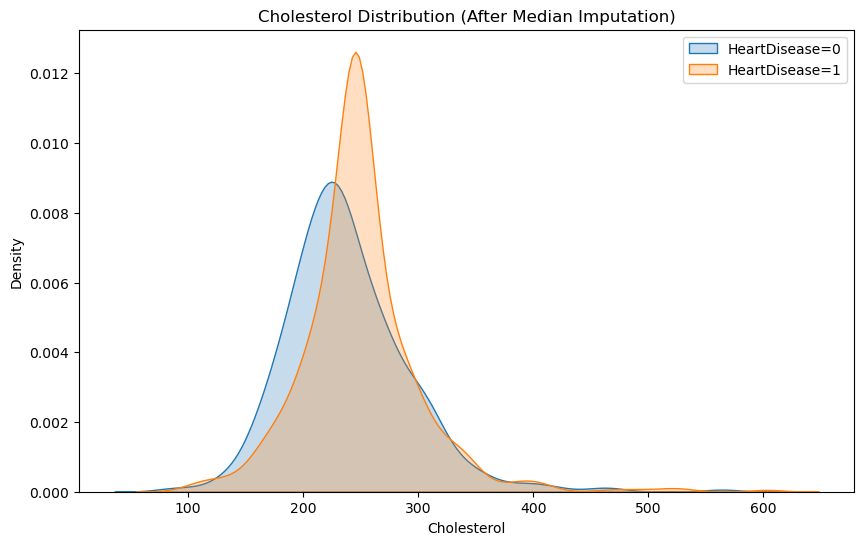

In [258]:
# KDE plot – distribution comparison after median imputation
plt.figure(figsize=(10,6))
sns.kdeplot(df_clean[df_clean["HeartDisease"]==0]["Cholesterol"], label="HeartDisease=0", fill=True)
sns.kdeplot(df_clean[df_clean["HeartDisease"]==1]["Cholesterol"], label="HeartDisease=1", fill=True)
plt.title("Cholesterol Distribution (After Median Imputation)")
plt.xlabel("Cholesterol")
plt.ylabel("Density")
plt.legend()
plt.show()

In [260]:
## Provides summary statistics for numeric columns for clean data, rounded to 2 decimals and transposed for readability.
df_clean.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,917.0,53.51,9.44,28.0,47.0,54.0,60.0,77.0
RestingBP,917.0,132.54,18.00,80.0,120.0,130.0,140.0,200.0
Cholesterol,917.0,244.57,53.39,85.0,214.0,246.0,267.0,603.0
FastingBS,917.0,0.23,0.42,0.0,0.0,0.0,0.0,1.0
MaxHR,917.0,136.79,25.47,60.0,120.0,138.0,156.0,202.0
Oldpeak,917.0,0.89,1.07,-2.6,0.0,0.6,1.5,6.2
HeartDisease,917.0,0.55,0.50,0.0,0.0,1.0,1.0,1.0


In [262]:
# Count negative Oldpeak values

neg_oldpeak_count = (df["Oldpeak"] < 0).sum()
print(f"Number of negative Oldpeak values: {neg_oldpeak_count}")

Number of negative Oldpeak values: 13


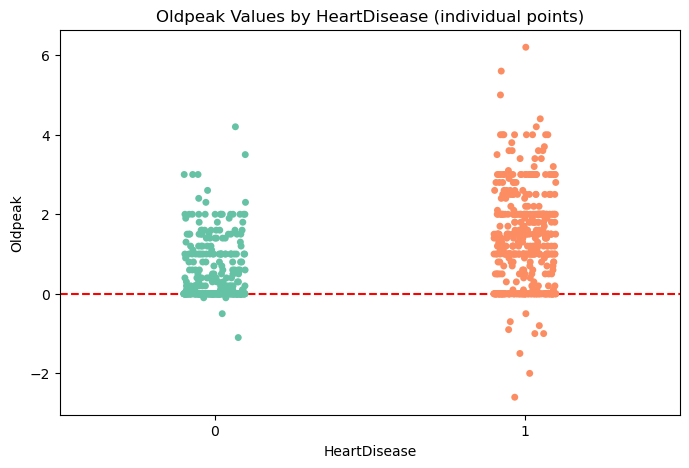

In [264]:
# Stripplot showing distribution of Oldpeak values by HeartDisease, with reference line at 0

plt.figure(figsize=(8,5))
sns.stripplot(x="HeartDisease", y="Oldpeak", data=df, jitter=True, palette="Set2")
plt.axhline(0, color="red", linestyle="--")
plt.title("Oldpeak Values by HeartDisease (individual points)")
plt.show()

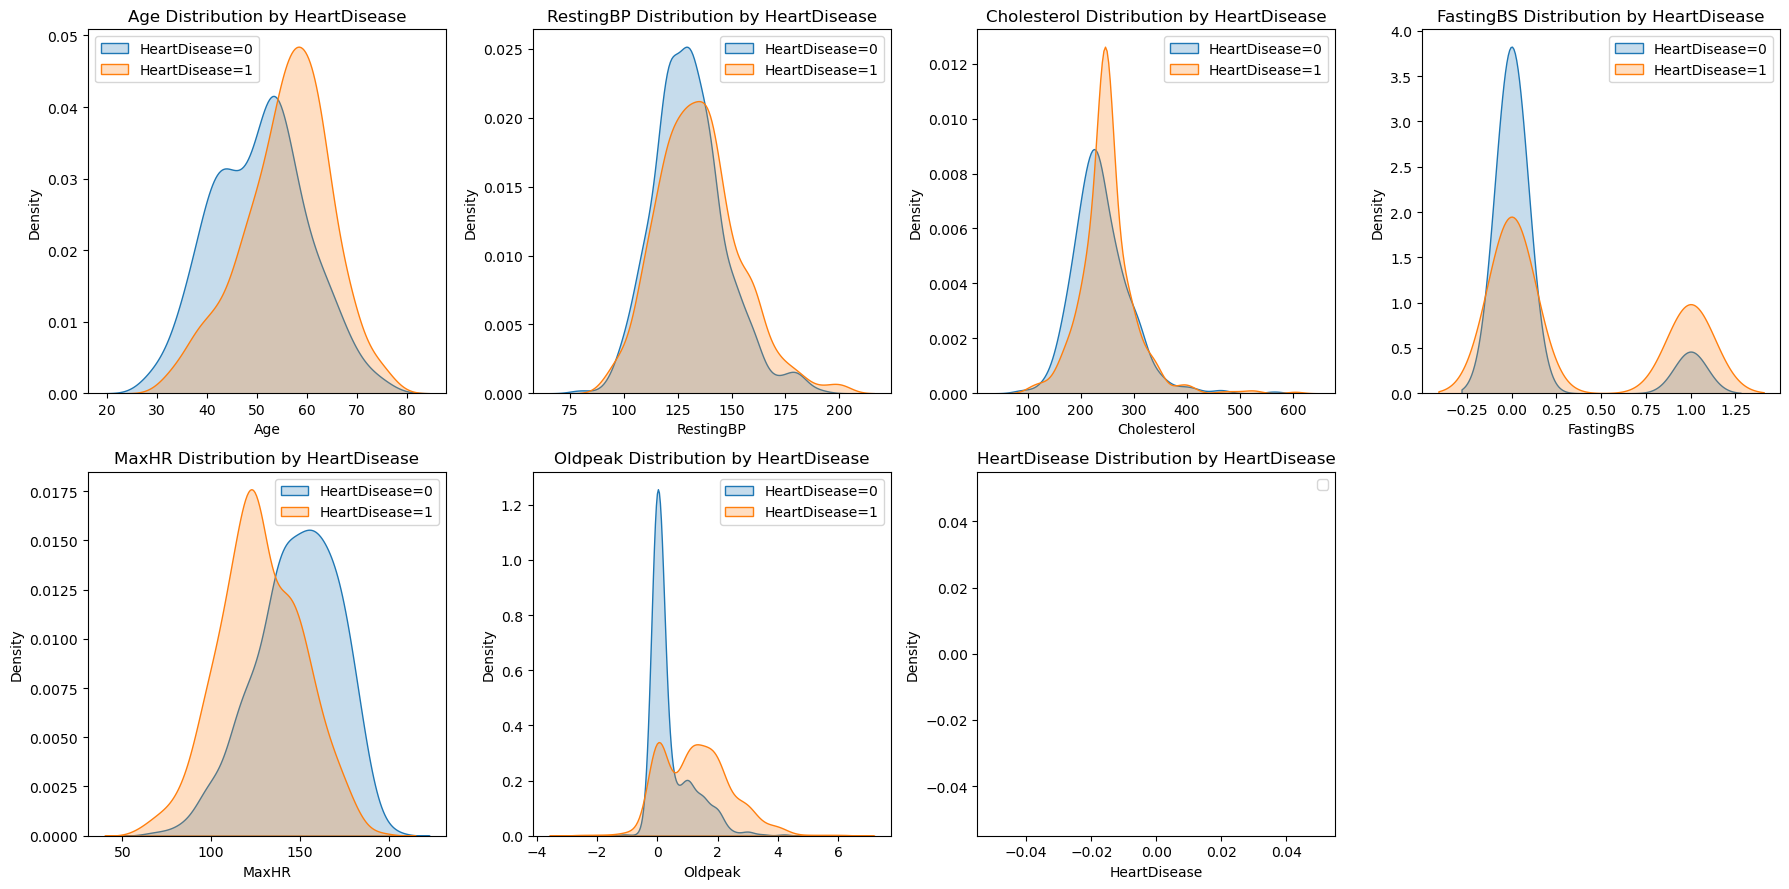

In [266]:
# Distributions of numerical features by HeartDisease status
fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.kdeplot(df_clean[df_clean["HeartDisease"]==0][col].dropna(), label="HeartDisease=0", fill=True, ax=ax)
    sns.kdeplot(df_clean[df_clean["HeartDisease"]==1][col].dropna(), label="HeartDisease=1", fill=True, ax=ax)
    ax.set_title(f"{col} Distribution by HeartDisease"); ax.legend()
    
# Remove empty subplot (8th panel
fig.delaxes(axes[len(num_cols)])
plt.tight_layout();
plt.show()

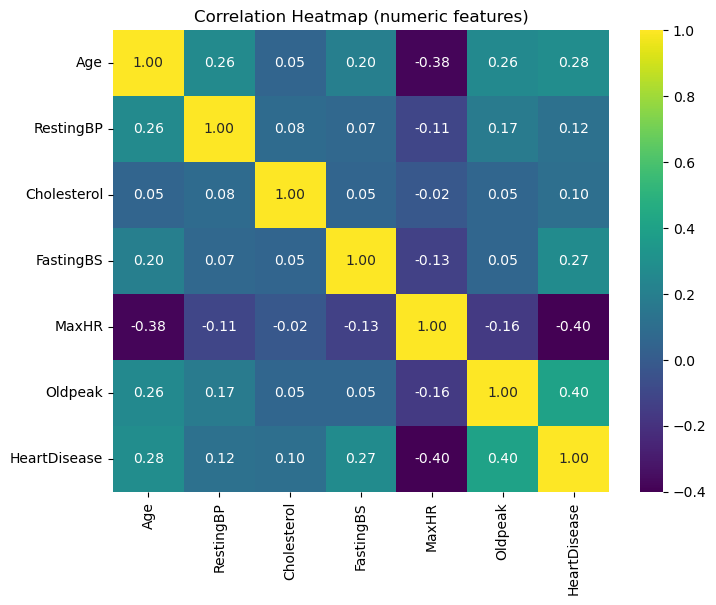

In [268]:
# Select only numerical columns and to check correlation
num_cols = df_clean.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(8,6))
sns.heatmap(df_clean[num_cols].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap (numeric features)")
plt.show()

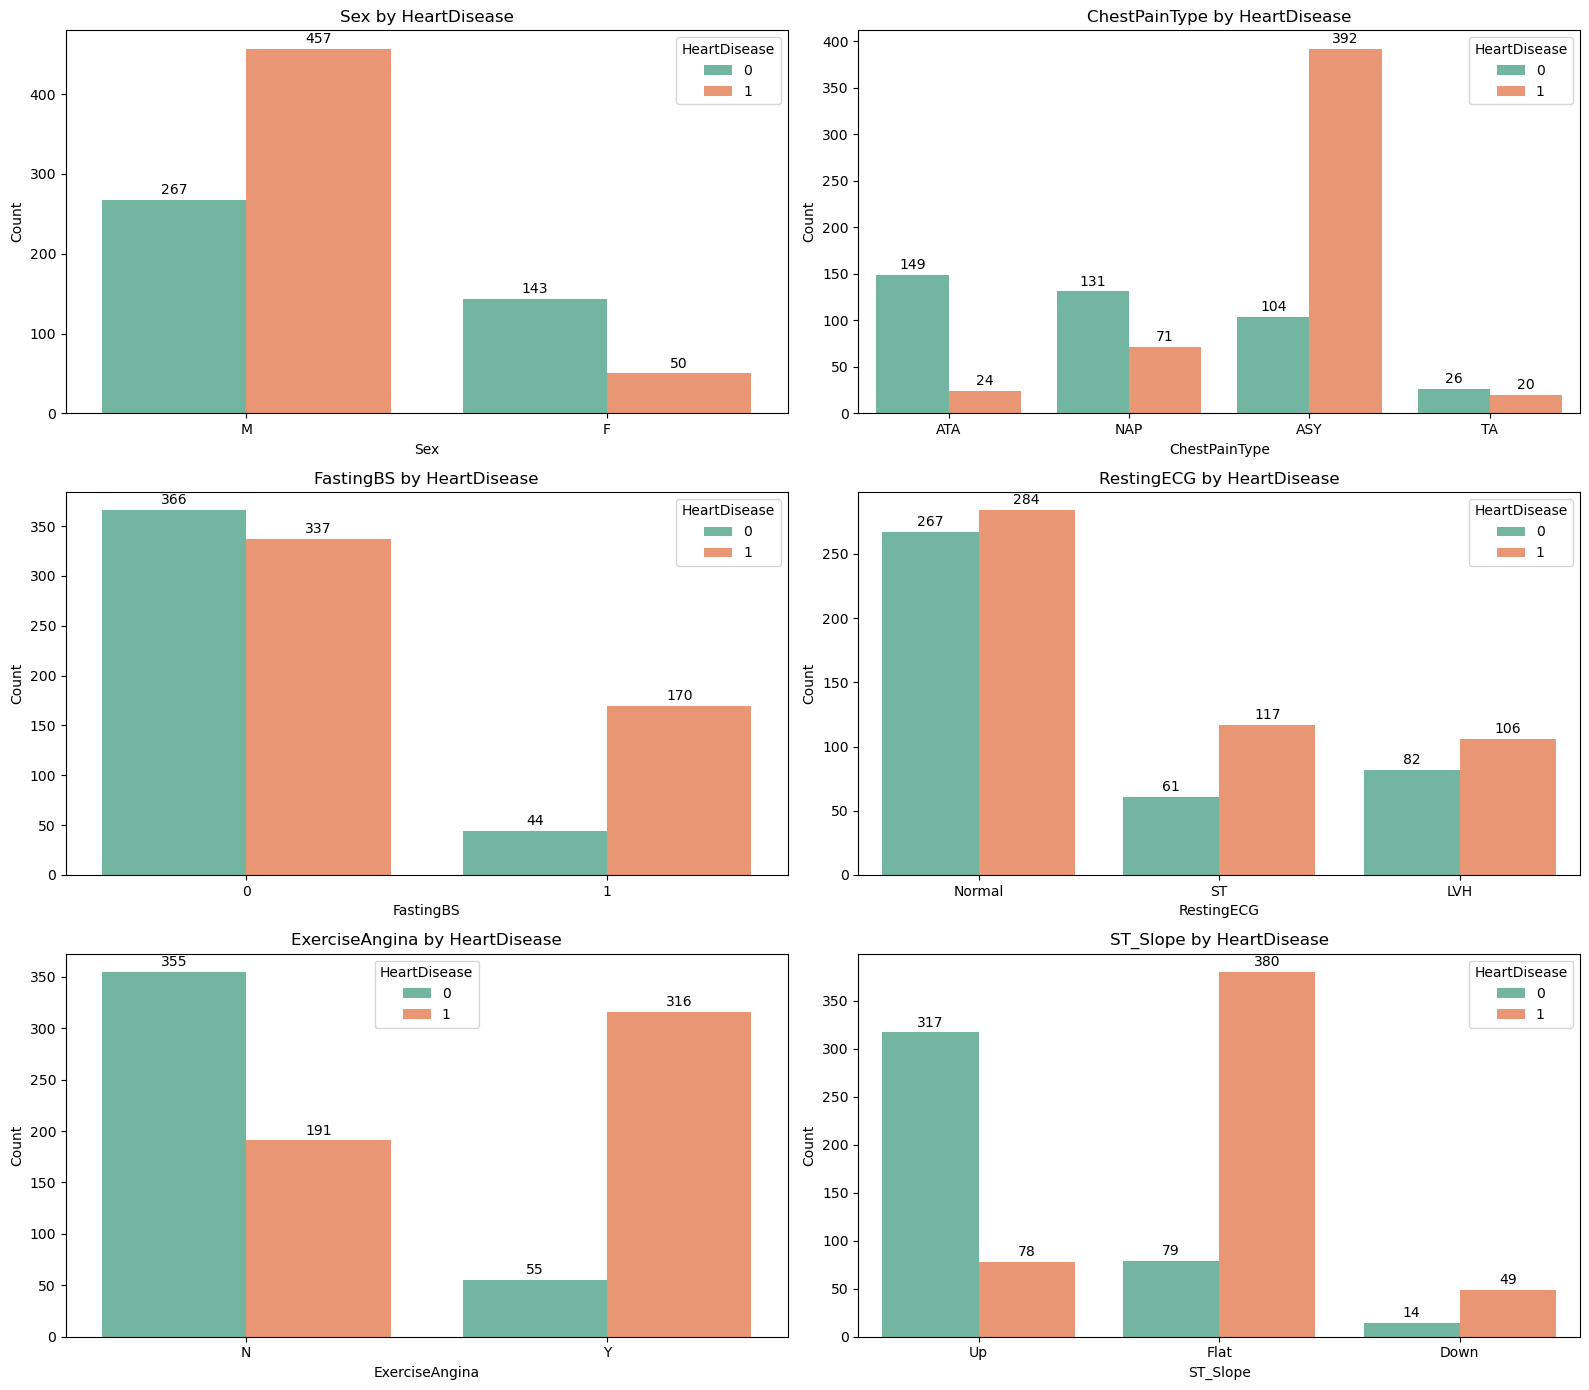

In [272]:
# Distribution of categorical variables by the target variable
cat_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]  # Excluding the target
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 14))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    g = sns.countplot(data=df_clean, x=col, hue="HeartDisease", palette="Set2", ax=ax, dodge=True)
    ax.set_title(f"{col} by HeartDisease")
    ax.set_xlabel(col); ax.set_ylabel("Count")
    # label name
    for c in g.containers:
        g.bar_label(c, padding=2, fmt="%.0f")
        
# Remove extra axes 
for ax in axes[len(cat_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [278]:
# One-hot encoding was applied to transform categorical variables into dummy variables for analysis
DUMMY = pd.get_dummies(df_clean, drop_first=True)
DUMMY.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


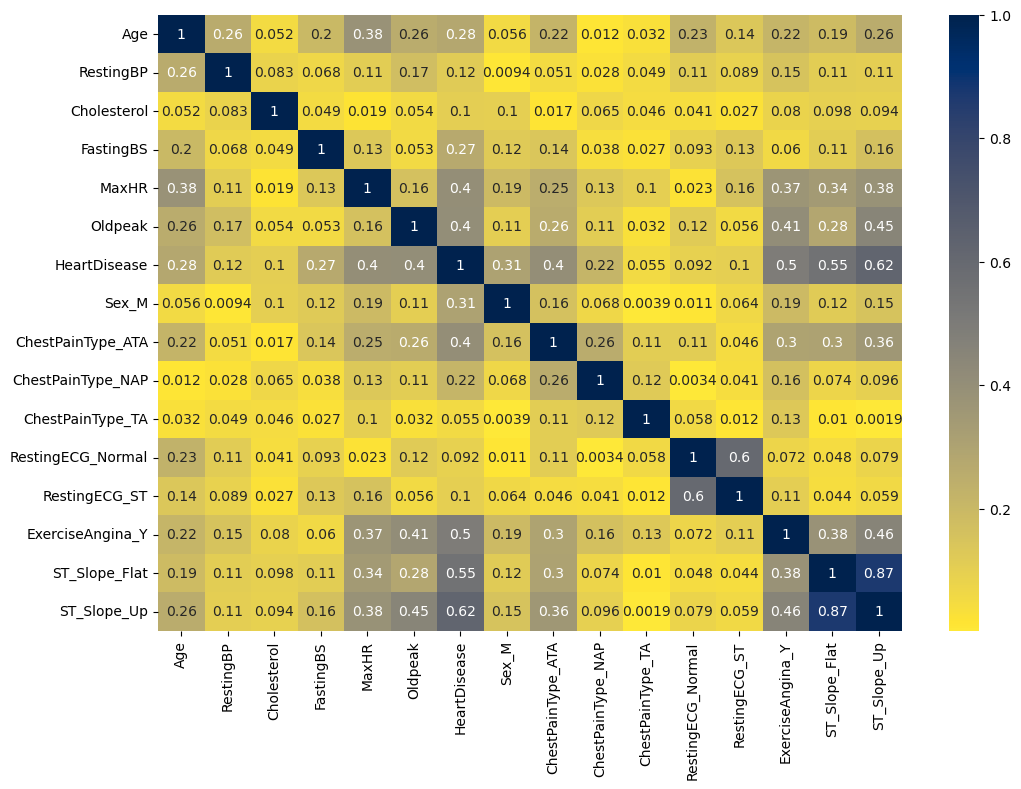

In [276]:
## Compute absolute pairwise correlations (after one-hot encoding) and visualize them with a heatmap
correlations = abs(DUMMY.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="cividis_r")
plt.show()